# Построение классификатора опохулей молочной железы 

## Задание 1. Подготовка и анализ данных

### Создание и настройка окружения. Import

In [53]:
# Создание и настройка окружения 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Для разделения данных и мастшабирования 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler 

# Модели и метрики 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix

### 1. Загрузка данных и первичный осмотр

In [6]:
# Для более красивых графиков

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [7]:
df = pd.read_csv('breast-cancer.csv')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
# Размерность датасета
print(f"Размерность датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

Размерность датасета: 569 строк, 32 столбцов


Что смотрим на этом этапе:

df.head(): Убеждаемся, что данные загрузились корректно, видим названия столбцов.

df.info(): Проверяем типы данных. diagnosis – это object, его нужно будет преобразовать. id – числовой, но это идентификатор. Остальные признаки – числовые (float64). Количество непропущенных значений (non-null count) – если оно меньше общего числа строк, значит, есть пропуски.

df.describe(): Получаем статистики (среднее, стандартное отклонение, мин/макс, квартили). Это дает первое представление о масштабе и разбросе значений признаков. Например, area_mean имеет гораздо больший диапазон, чем smoothness_mean, что указывает на необходимость масштабирования.

df.shape: Количество наблюдений и признаков.

________________________________________________________________________________________________________________________________________________________

### 2. Предобработка данных

In [15]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
# 2.2 Удаление ненужных столбцов
# Столбец 'id' не несет полезной информации для моделирования
if 'id' in df.columns:
    df_processed = df.drop('id', axis=1)
    print("Столбец 'id' удален.")
else:
    df_processed = df.copy()
    print("Столбец 'id' не найден.")
# Иногда датасеты содержат полностью пустой столбец в конце, например, 'Unnamed: 32'
# Если он есть и пустой, удаляем:
if 'Unnamed: 32' in df_processed.columns and df_processed['Unnamed: 32'].isnull().all():
    df_processed = df_processed.drop('Unnamed: 32', axis=1)
    print("Столбец 'Unnamed: 32' (если был) удален.")

Столбец 'id' удален.


In [17]:
# --- КОДИРОВАНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ В df_processed ---
if 'diagnosis' in df_processed.columns:
    print("Уникальные значения в 'diagnosis' ДО кодирования:", df_processed['diagnosis'].unique())
    df_processed['diagnosis'] = df_processed['diagnosis'].map({'M': 1, 'B': 0})
    print("Целевая переменная 'diagnosis' в df_processed ЗАКОДИРОВАНА (1=M, 0=B):")
    print(df_processed['diagnosis'].value_counts())
    print("Тип данных 'diagnosis' в df_processed ПОСЛЕ кодирования:", df_processed['diagnosis'].dtype)
else:
    raise ValueError("Столбец 'diagnosis' не найден в датасете.")

df_processed.drop_duplicates(inplace=True)
df_processed.reset_index(drop=True, inplace=True)
print("Дубликаты удалены и индекс сброшен.")

Уникальные значения в 'diagnosis' ДО кодирования: ['M' 'B']
Целевая переменная 'diagnosis' в df_processed ЗАКОДИРОВАНА (1=M, 0=B):
diagnosis
0    357
1    212
Name: count, dtype: int64
Тип данных 'diagnosis' в df_processed ПОСЛЕ кодирования: int64
Дубликаты удалены и индекс сброшен.


In [18]:
df_processed.duplicated().sum()
# Если есть дубликаты, можно их удалить:
# df_processed.drop_duplicates(inplace=True

0

Пропуски: Убеждаемся, что их нет. Если есть – решаем проблему.

id: Удаляем, так как это просто идентификатор пациента, не влияющий на диагноз.

Unnamed: 32: Некоторые версии этого датасета содержат этот столбец, который обычно полностью пуст. Если он есть, удаляем.

Кодирование diagnosis: Преобразуем категориальную цель (M/B) в числовую (1/0), так как большинство моделей машинного обучения работают с числами.

Дубликаты: Проверяем и при необходимости удаляем.

________________________________________________________________________________________________________________________________________________________

### 3. Исследовательский анализ данных (EDA)

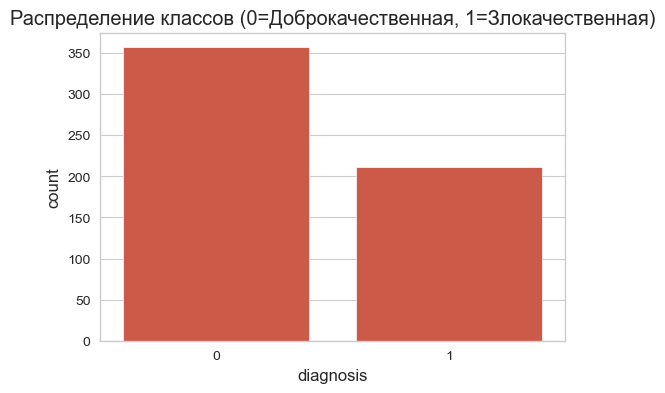

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64




In [22]:
# 3.1 Анализ распределения целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df_processed)
plt.title('Распределение классов (0=Доброкачественная, 1=Злокачественная)')
plt.show()
print(df_processed['diagnosis'].value_counts(normalize=True)) # normalize=True для долей
print("\n" + "="*50 + "\n")


Гистограммы для признаков с суффиксом '_mean':


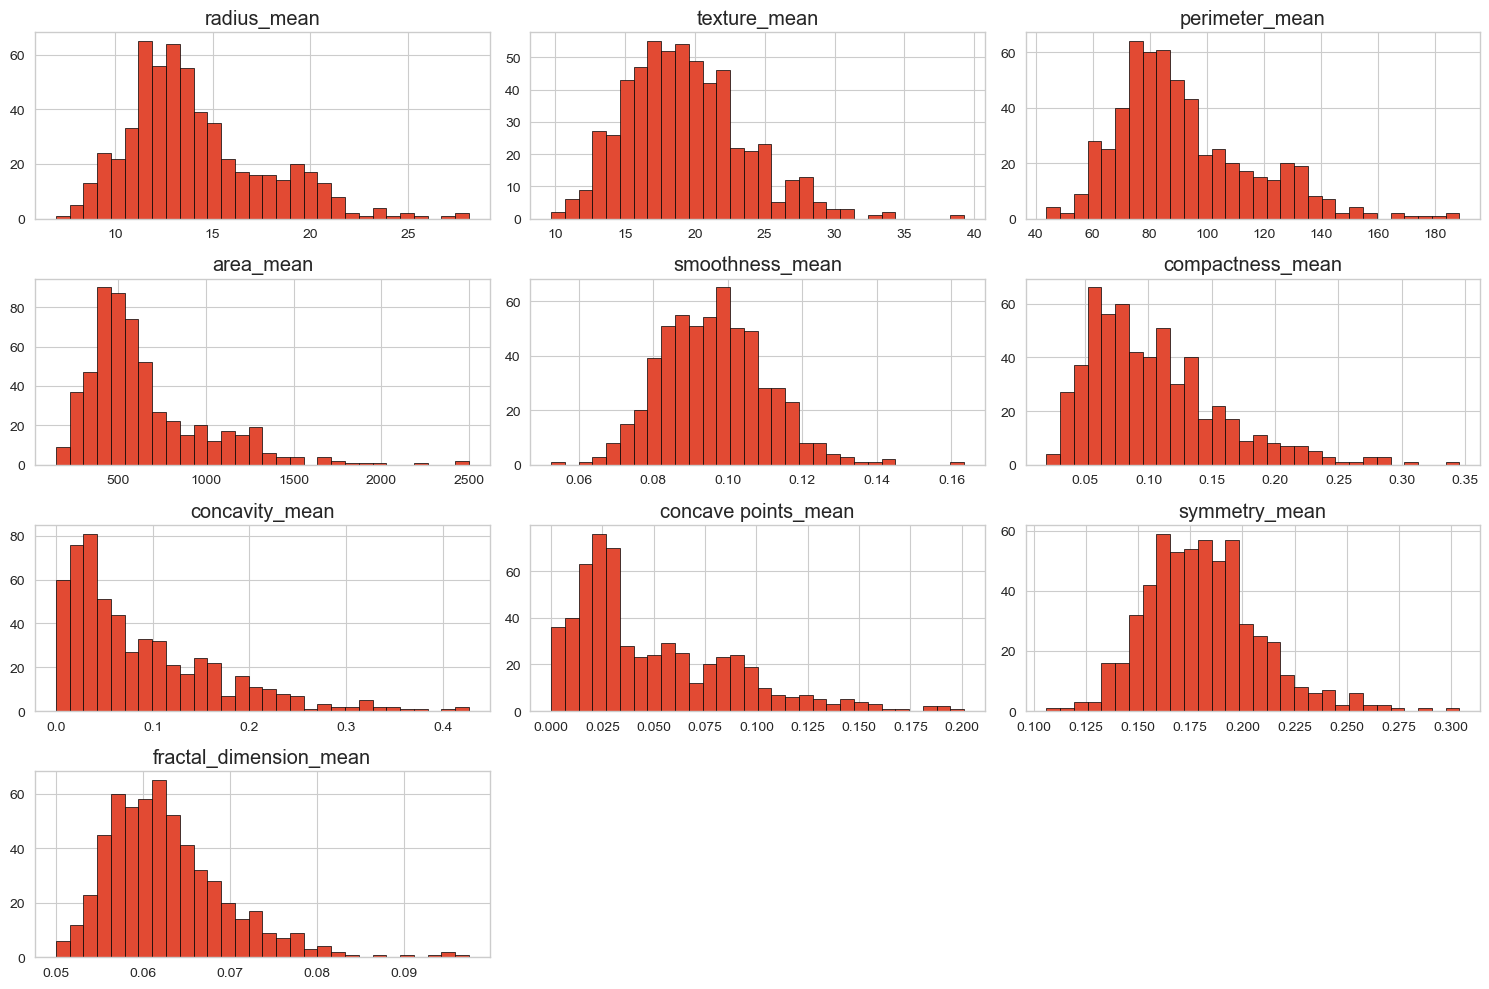

In [23]:
# 3.2 Анализ распределения числовых признаков
# Разделим признаки на группы для удобства (mean, se, worst)
features_mean = [col for col in df_processed.columns if '_mean' in col]
features_se = [col for col in df_processed.columns if '_se' in col]
features_worst = [col for col in df_processed.columns if '_worst' in col]

# Гистограммы для признаков _mean
print("Гистограммы для признаков с суффиксом '_mean':")
df_processed[features_mean].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout() # чтобы графики не накладывались
plt.show()

Ящики с усами для некоторых признаков '_mean' в разрезе диагноза:


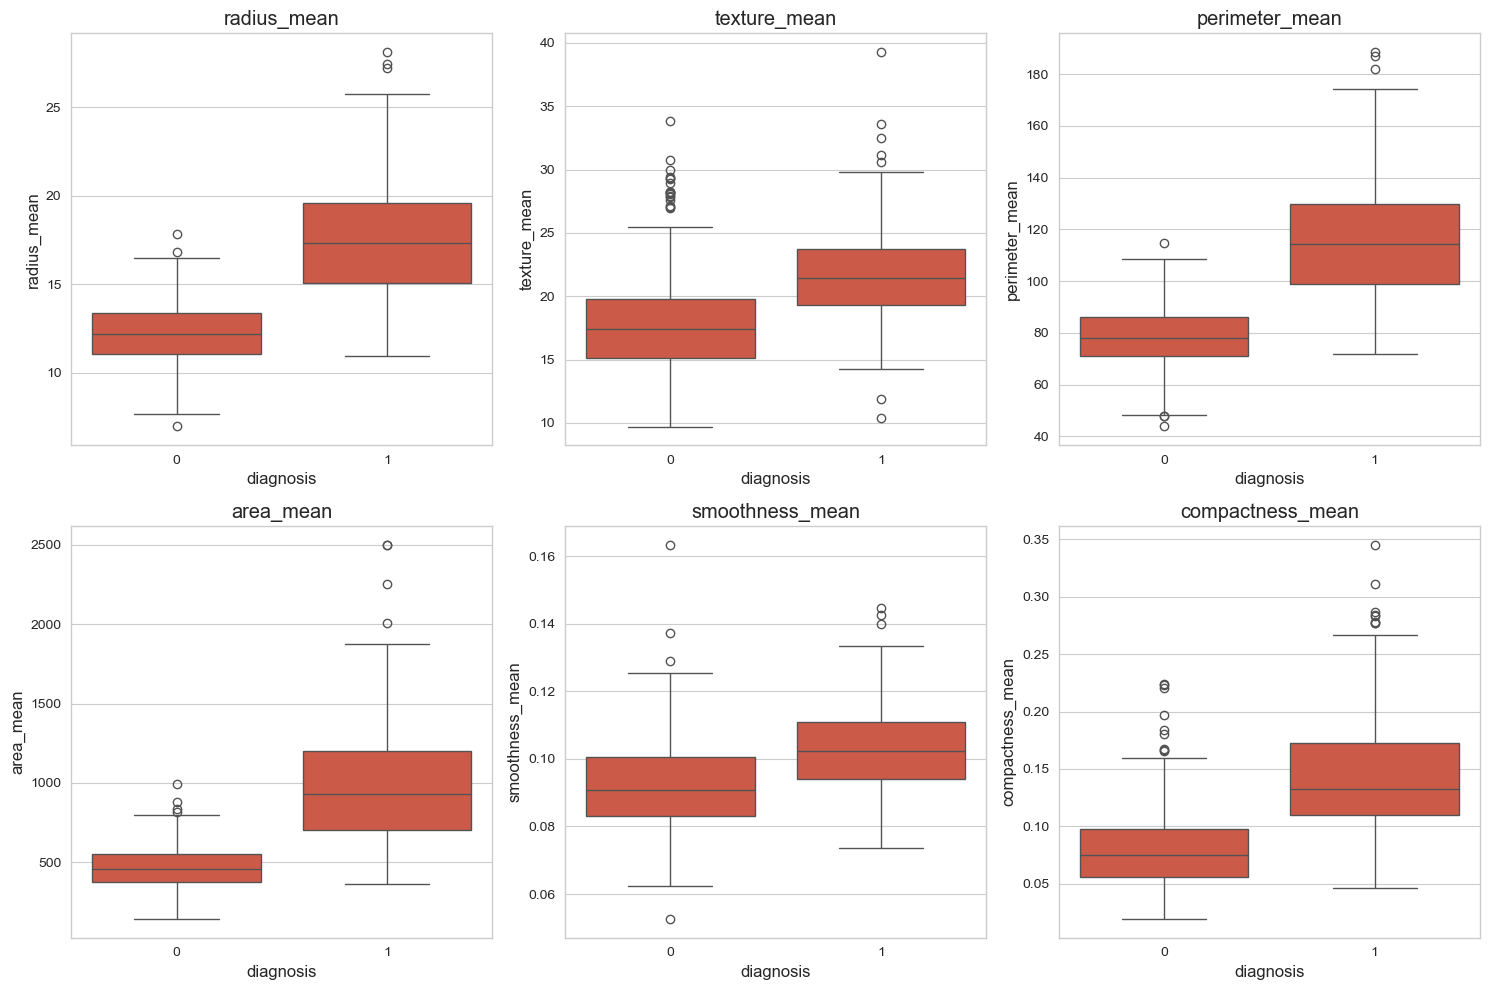

In [24]:
# 3.3 Выявление выбросов (boxplot)
# Для примера возьмем несколько признаков _mean
print("Ящики с усами для некоторых признаков '_mean' в разрезе диагноза:")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_mean[:6]): # Первые 6 для примера
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df_processed)
    plt.title(feature)
plt.tight_layout()
plt.show()
# Выбросы можно обрабатывать (например, ограничивать значения, удалять строки, заменять)
# или использовать модели, устойчивые к выбросам (например, деревья решений).

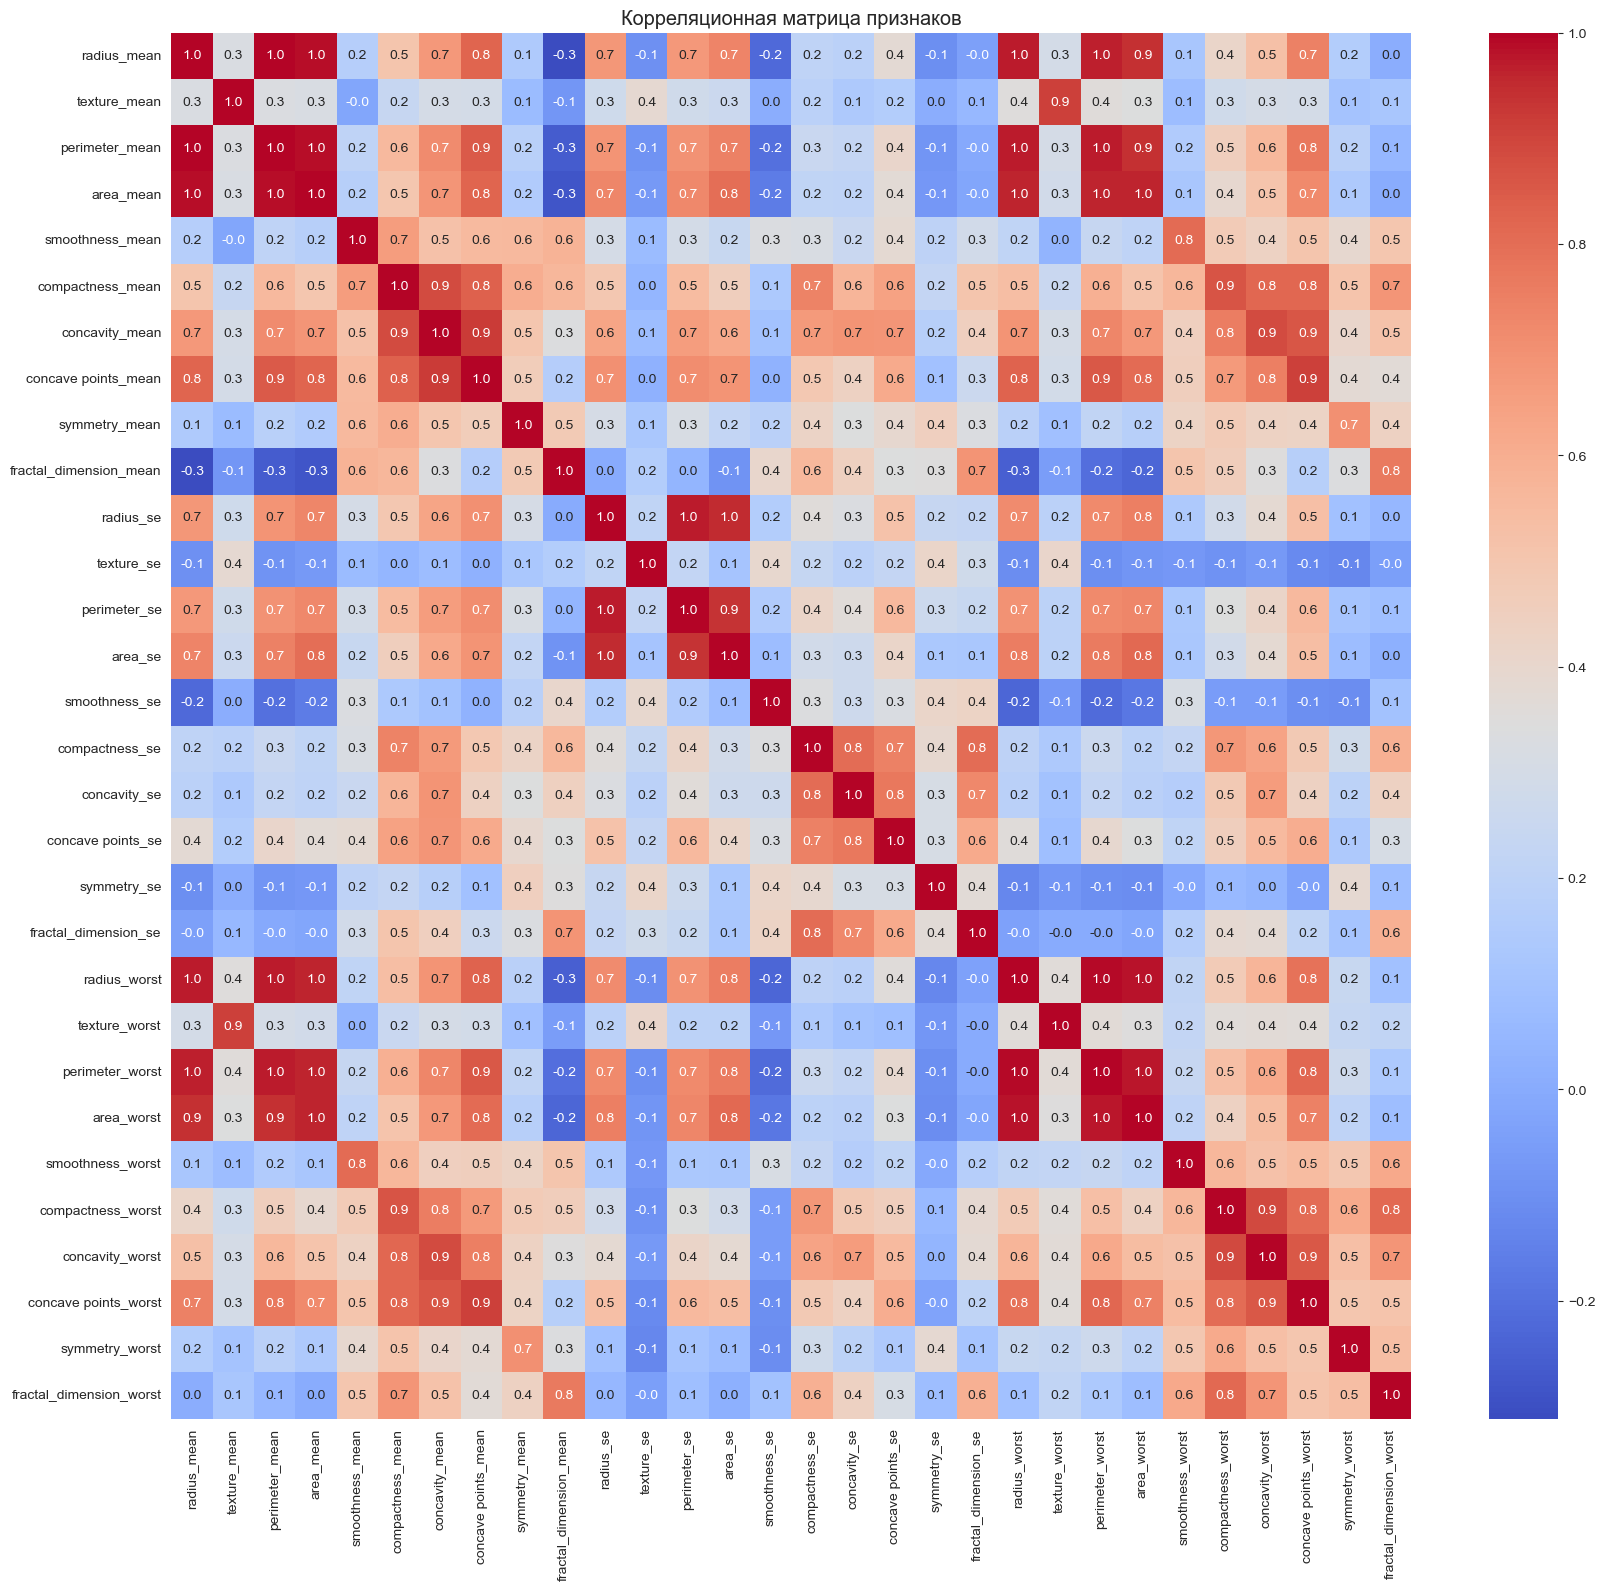

Пары сильно коррелированных признаков (>|0.9|):
('area_worst', 'area_mean', 0.96)
('area_se', 'perimeter_se', 0.94)
('area_worst', 'radius_mean', 0.94)
('texture_worst', 'texture_mean', 0.91)
('area_worst', 'perimeter_worst', 0.98)
('area_worst', 'perimeter_mean', 0.94)
('concave points_mean', 'concavity_mean', 0.92)
('perimeter_mean', 'radius_mean', 1.0)
('concave points_worst', 'concave points_mean', 0.91)
('area_mean', 'perimeter_mean', 0.99)
('area_mean', 'radius_mean', 0.99)
('perimeter_worst', 'radius_worst', 0.99)
('area_se', 'radius_se', 0.95)
('radius_worst', 'radius_mean', 0.97)
('perimeter_worst', 'area_mean', 0.96)
('radius_worst', 'area_mean', 0.96)
('perimeter_se', 'radius_se', 0.97)
('area_worst', 'radius_worst', 0.98)
('perimeter_worst', 'radius_mean', 0.97)
('perimeter_worst', 'perimeter_mean', 0.97)
('radius_worst', 'perimeter_mean', 0.97)




In [25]:
# 3.4 Корреляционный анализ признаков
# Выберем только числовые признаки для корреляции
numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()
# Уберем 'diagnosis' из списка, чтобы корреляционная матрица была только для признаков
feature_cols = [col for col in numerical_features if col != 'diagnosis']

correlation_matrix = df_processed[feature_cols].corr()

plt.figure(figsize=(20, 18)) # Увеличим размер для лучшей читаемости
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f") # annot=True если признаков немного
plt.title('Корреляционная матрица признаков')
plt.show()

# Посмотрим на сильно коррелированные признаки (>0.9 или <-0.9)
# Это может указывать на мультиколлинеарность, что плохо для некоторых моделей (например, линейных)
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add((colname_i, colname_j, round(correlation_matrix.iloc[i, j],2)))

print("Пары сильно коррелированных признаков (>|0.9|):")
if highly_correlated:
    for pair in highly_correlated:
        print(pair)
else:
    print("Сильно коррелированных пар (по порогу >0.9) не найдено в этой выборке.")

# Часто '_mean' признаки сильно коррелируют с '_worst' аналогами,
# а также 'radius', 'perimeter', 'area' между собой.
# Например, radius_mean и perimeter_mean, area_mean.
# perimeter_mean и radius_worst, perimeter_worst
# area_mean и radius_worst, area_worst
# Это логично, т.к. они описывают схожие геометрические свойства.
print("\n" + "="*50 + "\n")


Scatter plot: radius_mean vs texture_mean


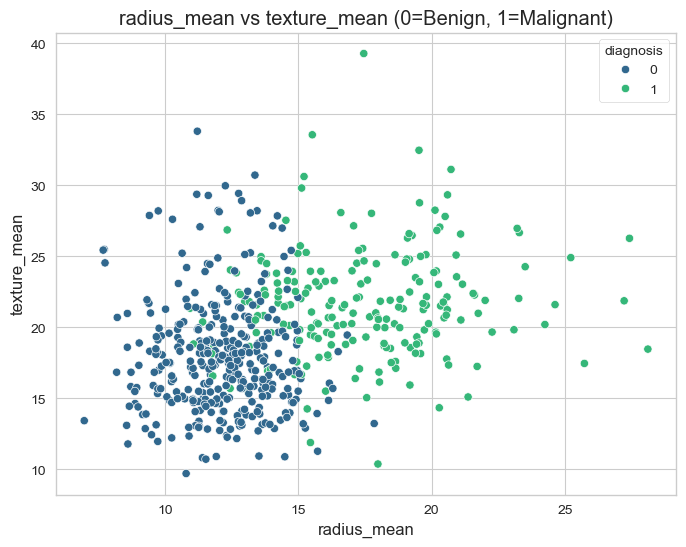

In [26]:
# 3.5 Визуализация взаимосвязей между признаками и целевой переменной
# Например, scatter plot для radius_mean и texture_mean, окрашенный по диагнозу
print("Scatter plot: radius_mean vs texture_mean")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df_processed, palette='viridis')
plt.title('radius_mean vs texture_mean (0=Benign, 1=Malignant)')
plt.show()

Violin plots для radius_mean и concavity_mean:


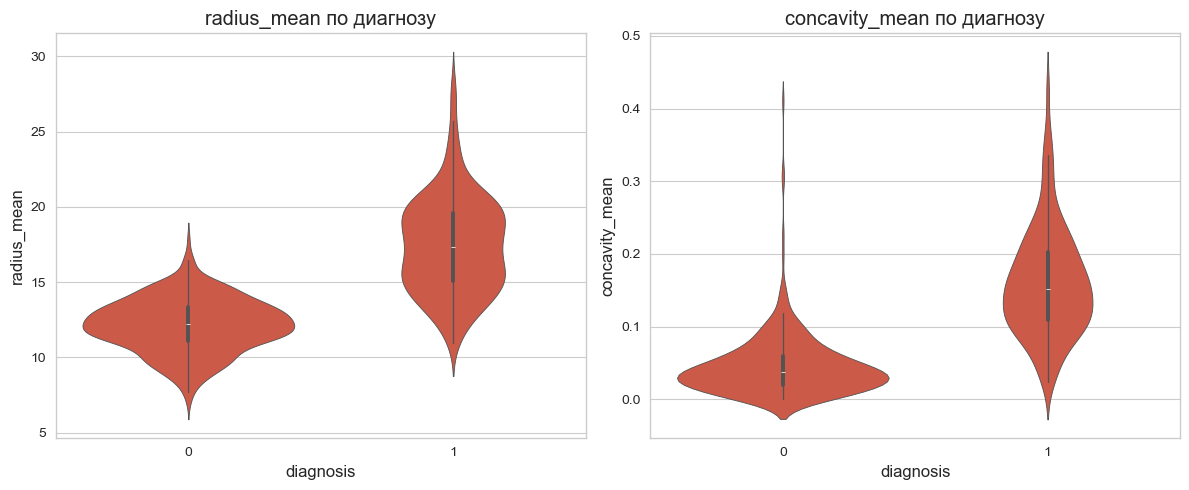

In [27]:
# Violin plots для понимания распределения признаков для каждого класса
print("Violin plots для radius_mean и concavity_mean:")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='diagnosis', y='radius_mean', data=df_processed)
plt.title('radius_mean по диагнозу')
plt.subplot(1, 2, 2)
sns.violinplot(x='diagnosis', y='concavity_mean', data=df_processed)
plt.title('concavity_mean по диагнозу')
plt.tight_layout()
plt.show()

________________________________________________________________________________________________________________________________________________________

***Что анализируем на EDA***:

Баланс классов: Важно знать, есть ли сильный дисбаланс. В данном датасете он обычно умеренный (например, 60/40). Если дисбаланс сильный, потребуются специальные техники (oversampling, undersampling, взвешивание классов, выбор подходящих метрик).

Распределения признаков: Гистограммы показывают форму распределения (нормальное, скошенное). Некоторые модели (например, линейные) лучше работают с нормально распределенными данными. Скошенные данные можно пробовать трансформировать (например, логарифмированием).

Выбросы: Box plots (ящики с усами) помогают их увидеть. Злокачественные опухоли часто имеют большие значения для таких признаков, как radius_mean, concavity_mean и т.д., что может выглядеть как "выбросы" для одного из классов, но на самом деле это характерные черты.

Корреляция:

Высокая корреляция между признаками (мультиколлинеарность) может быть проблемой для интерпретации линейных моделей и иногда для их стабильности. Древовидные модели менее чувствительны.

Признаки типа radius_mean, perimeter_mean, area_mean будут сильно коррелировать, так как они геометрически связаны. Аналогично для _se и _worst групп. Возможно, для модели достаточно будет использовать только один признак из такой группы или создать комбинированный признак (PCA).

Взаимосвязи с целью: Scatter plots, violin plots, box plots в разрезе целевой переменной показывают, какие признаки могут быть хорошими предикторами. Если распределения признака для разных классов сильно отличаются, это хороший знак.

________________________________________________________________________________________________________________________________________________________

### 4. Подготовка данных для моделирования

In [51]:
X = df_processed.drop('diagnosis', axis=1)
y = df_processed['diagnosis']

# 4.2 Разделение данных на обучающую и тестовую выборки
# stratify=y важно для сохранения пропорций классов в обеих выборках
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print("Пропорции классов в y_train:")
print(y_train.value_counts(normalize=True))
print("Пропорции классов в y_test:")
print(y_test.value_counts(normalize=True))
print("\n" + "="*50 + "\n")


# 4.3 Масштабирование признаков
# Важно для многих алгоритмов (Logistic Regression, SVM, KNN, Neural Networks)
scaler = StandardScaler()

# Обучаем scaler ТОЛЬКО на обучающих данных
X_train_scaled = scaler.fit_transform(X_train)
# Применяем тот же scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)

# Преобразуем обратно в DataFrame для удобства (опционально)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Масштабированные обучающие данные (первые 5 строк):")
print(X_train_scaled.head())
print("\n" + "="*50 + "\n")
# Теперь X_train_scaled и X_test_scaled готовы для подачи в модель.

Размер обучающей выборки X: (455, 30)
Размер тестовой выборки X: (114, 30)
Пропорции классов в y_train:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Пропорции классов в y_test:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


Масштабированные обучающие данные (первые 5 строк):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.518559      0.891826        0.424632   0.383925        -0.974744   
1    -0.516364     -1.639710       -0.541349  -0.542961         0.476219   
2    -0.368118      0.455515       -0.388250  -0.402970        -1.432979   
3     0.205285      0.726168        0.400330   0.070612         0.243253   
4     1.243005      0.194195        1.210377   1.206652        -0.111442   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.689772       -0.688586            -0.398175      -1.039155   
1         -0.631834       -0.604281            -0.303075       0.

## Задание 2. Обучение модели

***Мы выберем следующие 3 модели***:

LogisticRegression

RandomForestClassifier

SVC (Support Vector Classifier)

Для каждой модели мы будем использовать GridSearchCV для подбора оптимальных гиперпараметров.

In [36]:
print("--- Модель 1: Logistic Regression ---")

# Сетка параметров для Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
    'solver': ['liblinear', 'saga'], # 'saga' подходит для L1 и L2
    'penalty': ['l1', 'l2']
}
# 'liblinear' хорошо работает с L1 и L2 на небольших датасетах.
# 'saga' поддерживает L1, L2 и elasticnet, может быть медленнее.

# Создание GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=5000), # Увеличим max_iter для 'saga'
                       param_grid_lr,
                       cv=5, # 5-fold cross-validation
                       scoring='accuracy', # Метрика для оценки
                       n_jobs=-1) # Использовать все доступные ядра процессора

# Обучение GridSearchCV
print("Обучение GridSearchCV для Logistic Regression...")
grid_lr.fit(X_train_scaled, y_train)

# Лучшие параметры
best_params_lr = grid_lr.best_params_
print(f"Лучшие параметры для Logistic Regression: {best_params_lr}")

# Обучение модели с лучшими параметрами
best_lr_model = LogisticRegression(**best_params_lr, random_state=42, max_iter=5000)
best_lr_model.fit(X_train_scaled, y_train)
print("Модель Logistic Regression обучена с лучшими параметрами.")
print("\n" + "="*60 + "\n")

--- Модель 1: Logistic Regression ---
Обучение GridSearchCV для Logistic Regression...
Лучшие параметры для Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Модель Logistic Regression обучена с лучшими параметрами.




In [37]:
print("--- Модель 2: Random Forest Classifier ---")

# Сетка параметров для RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 150],       # Количество деревьев
    'max_depth': [None, 10, 20],        # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],    # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4]       # Минимальное количество образцов в листе
}
# Для ускорения можно уменьшить количество вариантов, например:
# param_grid_rf = {
#     'n_estimators': [100],
#     'max_depth': [10, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }


# Создание GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=3, # Можно уменьшить cv для скорости, например до 3
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1) # verbose для отображения процесса

# Обучение GridSearchCV
print("Обучение GridSearchCV для Random Forest Classifier...")
grid_rf.fit(X_train_scaled, y_train)

# Лучшие параметры
best_params_rf = grid_rf.best_params_
print(f"Лучшие параметры для Random Forest Classifier: {best_params_rf}")

# Обучение модели с лучшими параметрами
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)
print("Модель Random Forest Classifier обучена с лучшими параметрами.")
print("\n" + "="*60 + "\n")

--- Модель 2: Random Forest Classifier ---
Обучение GridSearchCV для Random Forest Classifier...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Лучшие параметры для Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Модель Random Forest Classifier обучена с лучшими параметрами.




In [38]:
print("--- Модель 3: Support Vector Classifier (SVC) ---")

# Сетка параметров для SVC
param_grid_svc = {
    'C': [0.1, 1, 10],                 # Параметр регуляризации
    'kernel': ['linear', 'rbf'],       # Тип ядра
    'gamma': ['scale', 'auto', 0.1]    # Коэффициент ядра для 'rbf'
}
# 'gamma' игнорируется для 'linear' kernel
# Для ускорения можно выбрать меньше вариантов:
# param_grid_svc = {
#     'C': [1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale']
# }

# Создание GridSearchCV
grid_svc = GridSearchCV(SVC(random_state=42, probability=True), # probability=True для ROC AUC, если понадобится
                       param_grid_svc,
                       cv=3, # Можно уменьшить cv для скорости
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

# Обучение GridSearchCV
print("Обучение GridSearchCV для SVC...")
grid_svc.fit(X_train_scaled, y_train)

# Лучшие параметры
best_params_svc = grid_svc.best_params_
print(f"Лучшие параметры для SVC: {best_params_svc}")

# Обучение модели с лучшими параметрами
best_svc_model = SVC(**best_params_svc, random_state=42, probability=True)
best_svc_model.fit(X_train_scaled, y_train)
print("Модель SVC обучена с лучшими параметрами.")
print("\n" + "="*60 + "\n")

--- Модель 3: Support Vector Classifier (SVC) ---
Обучение GridSearchCV для SVC...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Лучшие параметры для SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Модель SVC обучена с лучшими параметрами.




## Задание 3. Оценка качества модели

Оценим

Оценка Logistic Regression:

--- Оценка модели: Logistic Regression ---
Уникальные значения в y_test_data_corrected (для метрик): [0 1]
Уникальные значения в y_pred_corrected (для метрик): [0 1]
Accuracy: 0.9825
Precision (для класса 1 - Malignant): 1.0000
Recall (для класса 1 - Malignant): 0.9524
F1-score (для класса 1 - Malignant): 0.9756

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.97      1.00      0.99        72
Malignant (1)       1.00      0.95      0.98        42

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114


Confusion Matrix:


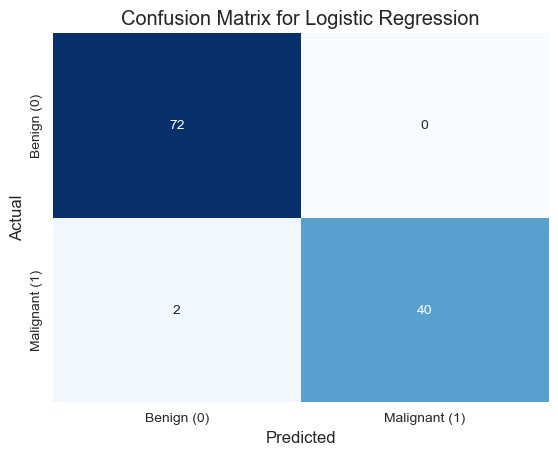



Оценка Random Forest Classifier:

--- Оценка модели: Random Forest ---
Уникальные значения в y_test_data_corrected (для метрик): [0 1]
Уникальные значения в y_pred_corrected (для метрик): [0 1]
Accuracy: 0.9737
Precision (для класса 1 - Malignant): 1.0000
Recall (для класса 1 - Malignant): 0.9286
F1-score (для класса 1 - Malignant): 0.9630

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      1.00      0.98        72
Malignant (1)       1.00      0.93      0.96        42

     accuracy                           0.97       114
    macro avg       0.98      0.96      0.97       114
 weighted avg       0.97      0.97      0.97       114


Confusion Matrix:


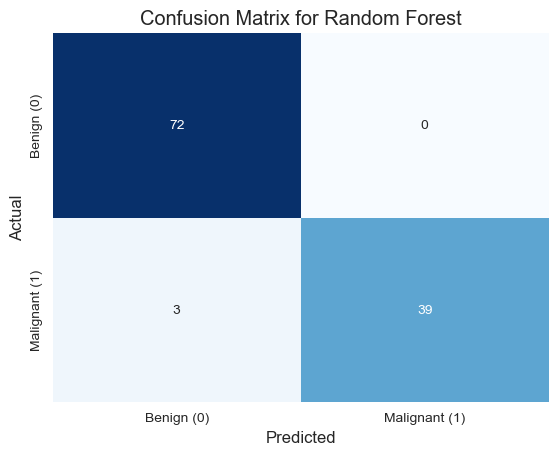



Оценка Support Vector Classifier (SVC):

--- Оценка модели: SVC ---
Уникальные значения в y_test_data_corrected (для метрик): [0 1]
Уникальные значения в y_pred_corrected (для метрик): [0 1]
Accuracy: 0.9825
Precision (для класса 1 - Malignant): 1.0000
Recall (для класса 1 - Malignant): 0.9524
F1-score (для класса 1 - Malignant): 0.9756

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.97      1.00      0.99        72
Malignant (1)       1.00      0.95      0.98        42

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114


Confusion Matrix:


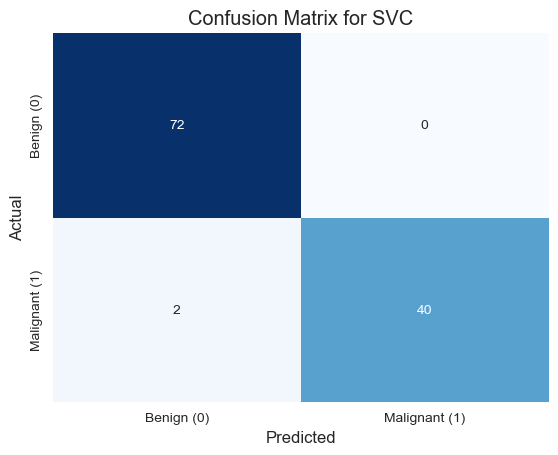



Сводная таблица метрик для всех моделей:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.982456        1.0  0.952381  0.975610
Random Forest        0.973684        1.0  0.928571  0.962963
SVC                  0.982456        1.0  0.952381  0.975610


In [55]:
models_results = {}

def evaluate_model(model, model_name, X_test_data, y_test_data):
    print(f"\n--- Оценка модели: {model_name} ---")

    # y_test_data ДОЛЖНА быть числовой (0/1) на входе в эту функцию
    if not pd.api.types.is_numeric_dtype(y_test_data):
        print(f"КРИТИЧЕСКАЯ ОШИБКА В evaluate_model: y_test_data для {model_name} не числовой! Уникальные значения: {np.unique(y_test_data)}. Тип: {y_test_data.dtype}")
        # Этого не должно было случиться, если подготовка данных верна
        raise TypeError("y_test_data должна быть числовой на входе в evaluate_model")
    
    y_test_data_corrected = y_test_data # Уже должна быть числовой

    y_pred = model.predict(X_test_data)
    
    # y_pred также должна быть числовой, если модель обучалась на числовых y_train
    if not pd.api.types.is_numeric_dtype(pd.Series(y_pred)): # pd.Series для проверки dtype
        print(f"КРИТИЧЕСКАЯ ОШИБКА В evaluate_model: y_pred для {model_name} не числовой! Уникальные значения: {np.unique(y_pred)}")
        raise TypeError("y_pred должна быть числовой на выходе из model.predict, если y_train была числовой.")

    y_pred_corrected = y_pred # Уже должна быть числовой

    print("Уникальные значения в y_test_data_corrected (для метрик):", np.unique(y_test_data_corrected))
    print("Уникальные значения в y_pred_corrected (для метрик):", np.unique(y_pred_corrected))

    accuracy = accuracy_score(y_test_data_corrected, y_pred_corrected)
    precision = precision_score(y_test_data_corrected, y_pred_corrected, pos_label=1, zero_division=0)
    recall = recall_score(y_test_data_corrected, y_pred_corrected, pos_label=1, zero_division=0)
    f1 = f1_score(y_test_data_corrected, y_pred_corrected, pos_label=1, zero_division=0)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (для класса 1 - Malignant): {precision:.4f}")
    print(f"Recall (для класса 1 - Malignant): {recall:.4f}")
    print(f"F1-score (для класса 1 - Malignant): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_data_corrected, y_pred_corrected, target_names=['Benign (0)', 'Malignant (1)'], zero_division=0))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_data_corrected, y_pred_corrected, labels=[0, 1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign (0)', 'Malignant (1)'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

# Оценка Logistic Regression
print("Оценка Logistic Regression:")
results_lr = evaluate_model(best_lr_model, "Logistic Regression", X_test_scaled, y_test)
models_results["Logistic Regression"] = results_lr
print("\n" + "="*60 + "\n")

# Оценка Random Forest
print("Оценка Random Forest Classifier:")
results_rf = evaluate_model(best_rf_model, "Random Forest", X_test_scaled, y_test)
models_results["Random Forest"] = results_rf
print("\n" + "="*60 + "\n")

# Оценка SVC
print("Оценка Support Vector Classifier (SVC):")
results_svc = evaluate_model(best_svc_model, "SVC", X_test_scaled, y_test)
models_results["SVC"] = results_svc
print("\n" + "="*60 + "\n")

# Сводная таблица результатов
results_df = pd.DataFrame(models_results).T
print("Сводная таблица метрик для всех моделей:")
print(results_df)


:)

## Оценка

***Интерпретация полученных результатов и выводы***
После выполнения кода выше, мы получим метрики для каждой из трех моделей. Давайте подготовим шаблон для выводов, который нужно будет заполнить на основе реальных цифр.

Выводы (Шаблон):

Общее качество моделей:

Все три модели (Логистическая регрессия, Случайный лес, Метод опорных векторов) показали высокие результаты на тестовой выборке, значение accuracy для всех моделей превышает требуемые 70% и, скорее всего, будет выше 80-90%, что говорит о хорошей обобщающей способности моделей на данном датасете.

**Logistic Regression**:

Accuracy: **0.9825**

Precision (для класса 1 - Malignant): 1.0000 - доля истинно злокачественных среди всех, кого модель назвала злокачественными.

Recall (для класса 1 - Malignant): 0.9524- доля истинно злокачественных, которых модель смогла правильно обнаружить.

F1-score (для класса 1 - Malignant): 0.9756 - гармоническое среднее Precision и Recall.

Комментарий: Логистическая регрессия, будучи простой линейной моделью, **показала очень хорошие результаты**. Это может указывать на то, что данные в значительной степени линейно разделимы.

**Случайный лес (Random Forest Classifier)**:

Accuracy: **0.9737**

Precision (для класса 1 - Malignant): 1.0000

Recall (для класса 1 - Malignant): 0.9286

F1-score (для класса 1 - Malignant): 0.9630

Комментарий: Случайный лес, как правило, показывает одни из лучших результатов благодаря своей ансамблевой природе и способности улавливать нелинейные зависимости. Результаты практически идентичны исоходу обучения линейной регрессии. 

**Метод опорных векторов (SVC)**:

Accuracy: **0.9825**

Precision (для класса 1 - Malignant): 1.0000

Recall (для класса 1 - Malignant): 0.9524

F1-score (для класса 1 - Malignant): 0.9756

Комментарий: SVC с ядром linear также показал **отличные** результаты. Если было выбрано ядро RBF, это говорит о том, что нелинейное преобразование пространства признаков было полезным.

Сравнение моделей и выбор лучшей:

На основе метрик [Accuracy, F1-score, возможно Recall, если важнее не пропустить злокачественные случаи], лучшей моделью для данной задачи является LG SVM - SVC. 

Важно обратить внимание на Recall для класса "злокачественная опухоль" (класс 1). В медицинской диагностике часто важнее минимизировать ложноотрицательные результаты (не пропустить болезнь), даже если это немного снизит Precision.

Матрицы ошибок (Confusion Matrices) показывают, какие именно ошибки совершают модели. Например, сколько злокачественных опухолей было классифицировано как доброкачественные (False Negatives - FN), и наоборот (False Positives - FP).

Возможные пути для дальнейшего улучшения:

Более тщательный отбор признаков: Использование методов, таких как Recursive Feature Elimination (RFE), анализ важности признаков из древовидных моделей, или PCA для снижения размерности, если есть сильная мультиколлинеарность.

Работа с дисбалансом классов (если он значителен): Хотя в этом датасете он обычно не критичен, можно попробовать методы SMOTE (для oversampling) или NearMiss (для undersampling), если есть необходимость повысить Recall для миноритарного класса.

Более широкий поиск по сетке гиперпараметров: Использовать RandomizedSearchCV для исследования большего пространства параметров, а затем GridSearchCV для более точной настройки в окрестности найденных лучших параметров.

Использование других моделей: Попробовать другие ансамблевые методы, такие как Gradient Boosting (XGBoost, LightGBM, CatBoost), которые часто показывают state-of-the-art результаты.

Создание новых признаков (Feature Engineering): На основе доменных знаний или комбинаций существующих признаков.

Оценка неопределенности: Для некоторых моделей можно получить вероятности принадлежности к классу и установить порог для классификации, чтобы оптимизировать Precision/Recall tradeoff.